In [1]:
import numpy as np
data = np.genfromtxt("data_TRIM_energy_angle.csv", delimiter=";", names=True)

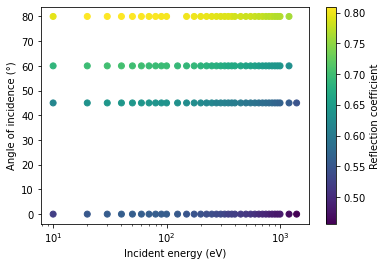

In [2]:
import matplotlib.pyplot as plt

plt.scatter(data["Incident_energy"], data["theta_inc"], c=data["Reflection_coeff"])
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(label="Reflection coefficient")
plt.show()

In [3]:
from inference.gp_tools import GpRegressor
from inference.gp_tools import RationalQuadratic, SquaredExponential

sim_points = [[np.log10(E), theta] for E, theta in zip(data["Incident_energy"], data["theta_inc"])]
GP = GpRegressor(sim_points, data["Reflection_coeff"], kernel=RationalQuadratic)

# evaluate the estimate
Nx, Ny = 60, 5
gp_x = np.log10(np.logspace(1, np.log10(1400), Nx))
gp_y = np.linspace(0, 80, Ny)

gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

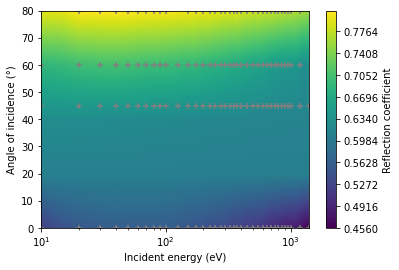

In [4]:
XX, YY = np.meshgrid(10**gp_x, gp_y)
mu_mu = mu.reshape([Nx, Ny]).T
sig_sig = sig.reshape([Nx, Ny]).T
CS = plt.contourf(XX, YY, mu_mu, levels=1000)
# CS = plt.contourf(XX, YY, sig_sig, levels=100)
plt.scatter(data["Incident_energy"], data["theta_inc"], marker="+", color="grey")#, c=data["Reflection_coeff"], edgecolors="grey")
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(CS, label="Reflection coefficient")
plt.show()

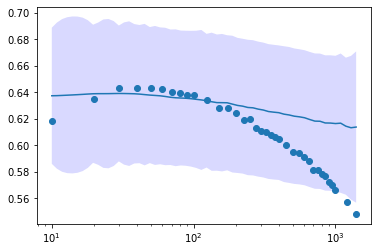

In [5]:
from scipy.interpolate import interp2d
reflection_coeff = interp2d(10**gp_x, gp_y, mu, kind='cubic')
sigma = interp2d(10**gp_x, gp_y, sig, kind='cubic')
angle = 45
mu_interp = np.array([float(reflection_coeff(energy, angle)) for energy in 10**gp_x])
sig_interp = np.array([float(sigma(energy, angle)) for energy in 10**gp_x])
plt.plot(10**gp_x, mu_interp)

plt.fill_between(
    10**gp_x, (mu_interp-sig_interp*2), (mu_interp+sig_interp*2),
    facecolor='blue', alpha=0.15)
plt.scatter(data["Incident_energy"][np.where(data["theta_inc"] == angle)], data["Reflection_coeff"][np.where(data["theta_inc"] == angle)])
plt.xscale("log")

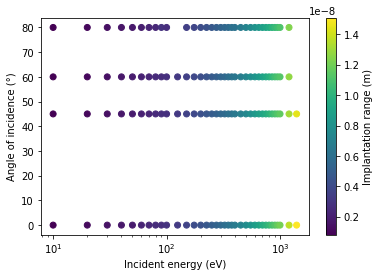

In [6]:
plt.scatter(data["Incident_energy"], data["theta_inc"], c=data["Implantation_range"])
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(label="Implantation range (m)")
plt.show()

In [7]:
sim_points = [[np.log10(E), theta] for E, theta in zip(data["Incident_energy"], data["theta_inc"])]
GP = GpRegressor(sim_points, data["Implantation_range"], kernel=RationalQuadratic)

# evaluate the estimate
Nx, Ny = 5, 5
gp_x = np.log10(np.logspace(1, np.log10(1400), Nx))
gp_y = np.linspace(0, 80, Ny)

gp_coords = [(i, j) for i in gp_x for j in gp_y]
mu, sig = GP(gp_coords)

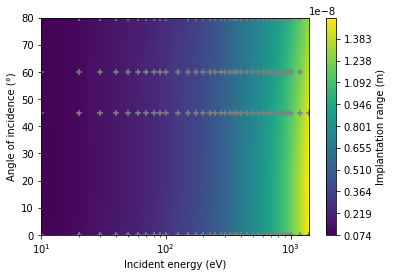

In [8]:
XX, YY = np.meshgrid(10**gp_x, gp_y)
mu_mu = mu.reshape([Nx, Ny]).T
sig_sig = sig.reshape([Nx, Ny]).T
CS = plt.contourf(XX, YY, mu_mu, levels=1000)
# CS = plt.contourf(XX, YY, sig_sig, levels=100)
plt.scatter(data["Incident_energy"], data["theta_inc"], marker="+", color="grey")
plt.xlabel("Incident energy (eV)")
plt.ylabel("Angle of incidence (°)")
plt.xscale("log")
plt.colorbar(CS, label="Implantation range (m)")
plt.show()